<a href="https://colab.research.google.com/github/aakashkumarme/MLAlgo/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **13 . Linear Regression**


Problem : You want to train a model that represents a linear relationship between the feature
and target vector.

In [16]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
# Load data with only two features
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features, target)
features

array([[6.3200e-03, 1.8000e+01],
       [2.7310e-02, 0.0000e+00],
       [2.7290e-02, 0.0000e+00],
       ...,
       [6.0760e-02, 0.0000e+00],
       [1.0959e-01, 0.0000e+00],
       [4.7410e-02, 0.0000e+00]])

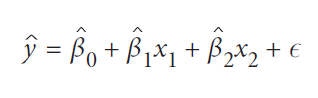

ŷ is our target, xi is the data for a single feature, β1 and β2 are the coefficients
identified by fitting the model, and ϵ is the error.

In [11]:
# View the intercept
model.intercept_
22.46681692105723

22.46681692105723

In [12]:
# View the feature coefficients
model.coef_

array([-0.35207832,  0.11610909])

In [13]:
# First value in the target vector multiplied by 1000
target[0]*1000

24000.0

In [14]:
# Predict the target value of the first observation, multiplied by 1000
model.predict(features)[0]*1000
24560.23872370844

24560.23872370844

Not bad! Our model was only off by $560.24!

Problem : 
You have a feature whose effect on the target variable depends on another feature.

In [17]:
# Load libraries
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
# Load data with only two features
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target
# Create interaction term
interaction = PolynomialFeatures(
degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features)
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features_interaction, target)

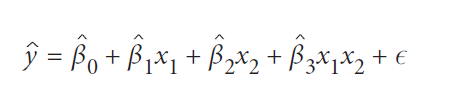

Imagine a simple coffee-based example where we have
two binary features—the presence of sugar (sugar) and whether or not we have stirred
(stirred)—and we want to predict if the coffee tastes sweet. Just putting sugar in the coffee (sugar=1, stirred=0) won’t make the coffee taste sweet (all the sugar is at
the bottom!) and just stirring the coffee without adding sugar (sugar=0, stirred=1)
won’t make it sweet either. Instead it is the interaction of putting sugar in the coffee
and stirring the coffee (sugar=1, stirred=1) that will make a coffee taste sweet. The
effects of sugar and stir on sweetness are dependent on each other. In this case we
say there is an interaction effect between the features sugar and stirred.
We can account for interaction effects by including a new feature comprising the
product of corresponding values from the interacting features: where x1 and x2 are the values of the sugar and stirred, respectively, and x1x2 represents the interaction between the two.

In [20]:
#To create an interaction term, we simply multiply those two values together for every observation:
# Import library
import numpy as np
# For each observation, multiply the values of the first and second feature
interaction_term = np.multiply(features[:, 0], features[:, 1])
#We can then view the interaction term for the first observation:
# View interaction term for first observation
interaction_term[0]
0.11376

0.11376

Problem : You want to model a nonlinear relationship.

In [21]:
# Load library
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
# Load data with one feature
boston = load_boston()
features = boston.data[:,0:1]
target = boston.target
# Create polynomial features x^2 and x^3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(features)
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features_polynomial, target)

Polynomial regression is an extension of linear regression to allow us to model nonlinear
relationships. To create a polynomial regression, convert the linear function we
used above into a polynomial function by adding polynomial features:
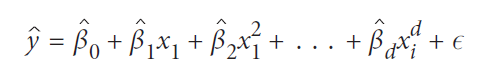

d is the degree of the polynomial.

**Reducing Variance with Regularization**

Problem : You want to reduce the variance of your linear regression model.
Solution  : Use a learning algorithm that includes a shrinkage penalty (also called regularization)
like ridge regression and lasso regression

In [23]:
# Load libraries
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
# Load data
boston = load_boston()
features = boston.data
target = boston.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create ridge regression with an alpha value
regression = Ridge(alpha=0.5)
# Fit the linear regression
model = regression.fit(features_standardized, target)

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In standard linear regression the model trains to minimize the sum of squared error
between the true (yi) and prediction, (yi) target values, or residual sum of squares
(RSS):

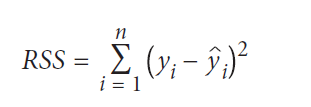

Regularized regression learners are similar, except they attempt to minimize RSS and
some penalty for the total size of the coefficient values, called a shrinkage penalty
because it attempts to “shrink” the model. There are two common types of regularized
learners for linear regression: ridge regression and the lasso. The only formal difference
is the type of shrinkage penalty used. In ridge regression, the shrinkage penalty
is a tuning hyperparameter multiplied by the squared sum of all coefficients:

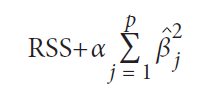

where βj is the coefficient of the jth of p features and α is a hyperparameter.


The lasso is similar, except the shrinkage penalty is a tuning hyperparameter
multiplied by the sum of the absolute value of all coefficients:
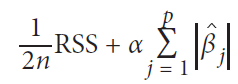
where n is the number of observations.

As a very general
rule of thumb, ridge regression often produces slightly better predictions than
lasso, but lasso produces more interpretable
models. If we want a balance between ridge and lasso’s penalty functions we can
use **elastic net**, which is simply a regression model with both penalties included.

In [24]:
#The hyperparameter, α, lets us control how much we penalize the coefficients, with higher values of α creating simpler models
# Load library
from sklearn.linear_model import RidgeCV
# Create ridge regression with three alpha values
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
# Fit the linear regression
model_cv = regr_cv.fit(features_standardized, target)
# View coefficients
model_cv.coef_

array([-0.91987132,  1.06646104,  0.11738487,  0.68512693, -2.02901013,
        2.68275376,  0.01315848, -3.07733968,  2.59153764, -2.0105579 ,
       -2.05238455,  0.84884839, -3.73066646])

In [25]:
# View alpha
model_cv.alpha_

1.0

In linear regression the value of the coefficients is partially
determined by the scale of the feature, and in regularized models all coefficients are
summed together, we must make sure to standardize the feature prior to training.

***Reducing Features with Lasso Regression***

Problem : You want to simplify your linear regression model by reducing the number of features.

In [27]:
# Load library
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
# Load data
boston = load_boston()
features = boston.data
target = boston.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create lasso regression with alpha value
regression = Lasso(alpha=0.5)
# Fit the linear regression
model = regression.fit(features_standardized, target)

One interesting characteristic of lasso regression’s penalty is that it can shrink the
coefficients of a model to zero, effectively reducing the number of features in the
model. For example, in our solution we set alpha to 0.5 and we can see that many of
the coefficients are 0, meaning their corresponding features are not used in the
model:
The practical benefit of this effect is that it means that we could include 100 features
in our feature matrix and then, through adjusting lasso’s α hyperparameter, produce a
model that uses only 10 (for instance) of the most important features. This lets us
reduce variance while improving the interpretability of our model (since fewer features
is easier to explain).
232 |